### ML Practice
(c) 2021 Moon Seung-gi

### MNIST Dataset
#### Fully-connected

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


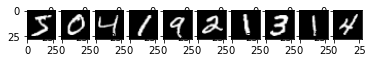

In [ ]:
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i], 'gray')
plt.show()

In [ ]:
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.15), metrics=['acc'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=500, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 0s 8us/sample - loss: 1.5006 - acc: 0.5173 - val_loss: 0.7277 - val_acc: 0.8547
Epoch 2/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.7813 - acc: 0.7623 - val_loss: 0.4451 - val_acc: 0.8905
Epoch 3/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.6121 - acc: 0.8196 - val_loss: 0.3537 - val_acc: 0.9093
Epoch 4/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.5313 - acc: 0.8487 - val_loss: 0.3167 - val_acc: 0.9163
Epoch 5/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.4882 - acc: 0.8625 - val_loss: 0.2782 - val_acc: 0.9233
Epoch 6/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.4460 - acc: 0.8755 - val_loss: 0.3029 - val_acc: 0.9130
Epoch 7/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.4223 - acc: 0.8820 - val_loss: 0.2626 - 

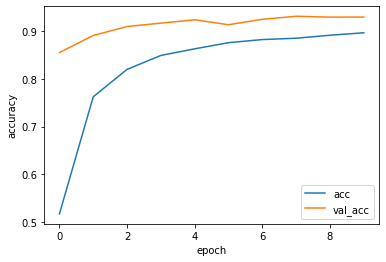

In [ ]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc))

10000/10000 [==============================] - 0s 29us/sample - loss: 0.2492 - acc: 0.9269
loss: 0.249
acc: 0.927


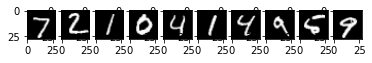

[7 2 1 0 4 1 4 9 6 9]


In [ ]:
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)

### CIFAR-10 Dataset
#### Convolutional

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


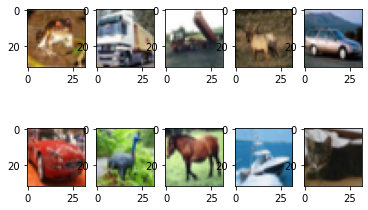

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
plt.show()

In [ ]:
print(train_labels[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 5s 106us/sample - loss: 1.7762 - acc: 0.3401 - val_loss: 1.4113 - val_acc: 0.4818
Epoch 2/20
45000/45000 [==============================] - 4s 79us/sample - loss: 1.3684 - acc: 0.4990 - val_loss: 1.1434 - val_acc: 0.5966
Epoch 3/20
45000/45000 [==============================] - 4s 80us/sample - loss: 1.2072 - acc: 0.5661 - val_loss: 0.9983 - val_acc: 0.6486
Epoch 4/20
45000/45000 [==============================] - 4s 80us/sample - loss: 1.0785 - acc: 0.6127 - val_loss: 0.9092 - val_acc: 0.6892
Epoch 5/20
45000/45000 [==============================] - 4s 80us/sample - loss: 1.0015 - acc: 0.6432 - val_loss: 0.8391 - val_acc: 0.7138
Epoch 6/20
45000/45000 [==============================] - 4s 85us/sample - loss: 0.9338 - acc: 0.6674 - val_loss: 0.8226 - val_acc: 0.7166
Epoch 7/20
45000/45000 [==============================] - 4s 80us/sample - loss: 0.8868 - acc: 0.6837 - val_loss: 0.

In [ ]:
model.save('convolution.h5')

In [ ]:
model = load_model('convolution.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


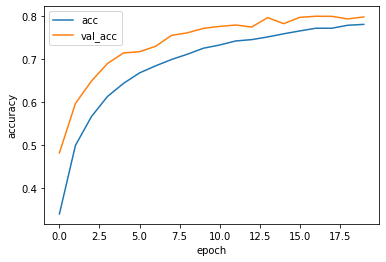

In [ ]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc))

10000/10000 [==============================] - 1s 71us/sample - loss: 0.6199 - acc: 0.7888
loss: 0.620
acc: 0.789


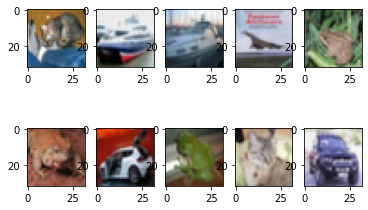

['cat', 'ship', 'automobile', 'airplane', 'frog', 'frog', 'automobile', 'bird', 'cat', 'automobile']


In [ ]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
plt.show()

test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print([labels[n] for n in test_predictions])

#### ResNet

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Activation, Add ,BatchNormalization, Conv2D, Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [4]:
def conv(filters, kernel_size, strides=1):
    return Conv2D(filters, kernel_size, strides=strides, padding='same', use_bias=False, kernel_initializer='he_normal', kernel_regularizer=l2(0.0001))

In [5]:
# Resudial Block A

def first_residual_unit(filters, strides):
    def f(x):
        x = BatchNormalization()(x)
        b = Activation('relu')(x)
        
        x = conv(filters // 4, 1, strides)(b)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        x = conv(filters // 4, 3)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        x = conv(filters, 1)(x)
        
        sc = conv(filters, 1, strides)(b)
        
        return Add()([x, sc])
    return f

In [6]:
# Residual Block B

def residual_unit(filters):
    def f(x):
        sc = x
        
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        x = conv(filters // 4, 1)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        x = conv(filters // 4, 3)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        x = conv(filters, 1)(x)
        
        return Add()([x, sc])
    return f

In [7]:
def residual_block(filters, strides, unit_size):
    def f(x):
        x = first_residual_unit(filters, strides)(x)
        for i in range(unit_size - 1):
            x = residual_unit(filters)(x)
        return x
    return f

In [14]:
# Create model

input = Input(shape=(32, 32, 3))

x = conv(16, 3)(input)

x = residual_block(64, 1, 9)(x)
x = residual_block(128, 1, 9)(x)
x = residual_block(256, 1, 9)(x)

x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)

output = Dense(10, activation='softmax', kernel_regularizer=l2(0.0001))(x)

gpu_model = Model(inputs=input, outputs=output)

In [1]:
# Downgrade Tensorflow to 1.13.1 (For Google Colab)
!pip uninstall tensorflow
!pip install tensorflow==1.13.1

Uninstalling tensorflow-2.4.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.4.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.0
     |████████████████████████████████| 92.5MB 55kB/s 
     |████████████████████████████████| 3.2MB 40.2MB/s 
     |████████████████████████████████| 368kB 38.0MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninst

In [15]:
# Convert to TPU model

import tensorflow as tf
import os

model = tf.contrib.tpu.keras_to_tpu_model(
    gpu_model,
    strategy = tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(
            tpu='grpc://' + os.environ['COLAB_TPU_ADDR']
        )
    )
)

INFO:tensorflow:Querying Tensorflow master (grpc://10.49.236.162:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 18334713709877329260)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 8589934592, 3924496684402178983)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 9276325552867228851)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 5092980735063156905)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 11166170013984287966)
INFO:tensorflow:*** Available Device: _Dev

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(momentum=0.9), metrics=['acc'])

INFO:tensorflow:Cloning SGD {'lr': 0.009999999776482582, 'momentum': 0.8999999761581421, 'decay': 0.0, 'nesterov': False}


In [17]:
train_gen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    width_shift_range=0.125,
    height_shift_range=0.125,
    horizontal_flip=True)

test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

for data in (train_gen, test_gen):
    data.fit(train_images)

In [12]:
# LearningRateScheduler

def step_decay(epoch):
    x = 0.1
    
    if epoch >= 80: x = 0.01
    if epoch >= 120: x = 0.001
    return x
lr_decay = LearningRateScheduler(step_decay)

In [18]:
batch_size = 128
history = model.fit_generator(
    train_gen.flow(
        train_images,
        train_labels,
        batch_size=batch_size),
    epochs=100,
    steps_per_epoch=train_images.shape[0] // batch_size,
    validation_data=test_gen.flow(
        test_images,
        test_labels,
        batch_size=batch_size),
    validation_steps=test_images.shape[0] // batch_size,
    callbacks=[lr_decay]
)

Epoch 1/100
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(16,), dtype=tf.int32, name='core_id_20'), TensorSpec(shape=(16, 32, 32, 3), dtype=tf.float32, name='input_2_10'), TensorSpec(shape=(16, 10), dtype=tf.float32, name='dense_1_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning SGD {'lr': 0.10000000149011612, 'momentum': 0.8999999761581421, 'decay': 0.0, 'nesterov': False}
INFO:tensorflow:Remapping placeholder for input_2
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.SGD object at 0x7f65351eb3c8> []
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 67.34541177749634 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr: 0.10000000149011612 {0.1}
INFO:tensorflow:CPU -> TPU momentum: 0.8999999761581421 {0.9}
INFO:tensorflow:CPU -> TPU decay: 0.0 {0.0}
218/391 [===============>..............] - ETA: 3:02 - loss: 3.1249 -

In [19]:
model.save('resnet.h5')

INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:TPU -> CPU lr: 0.009999999776482582
INFO:tensorflow:TPU -> CPU momentum: 0.8999999761581421
INFO:tensorflow:TPU -> CPU decay: 0.0
INFO:tensorflow:TPU -> CPU nesterov: False


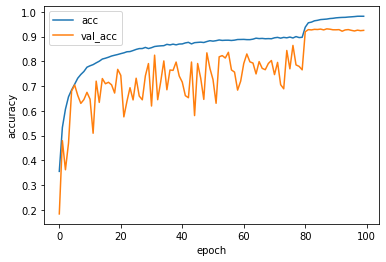

In [20]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [25]:
# Evaluation

batch_size = 128
test_loss, test_acc = model.evaluate_generator(
    test_gen.flow(test_images, test_labels, batch_size=batch_size), steps=10
)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc))

loss: 0.470
acc: 0.926


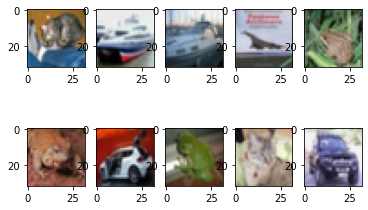

INFO:tensorflow:New input shapes; (re-)compiling: mode=infer (# of cores 8), [TensorSpec(shape=(1, 32, 32, 3), dtype=tf.float32, name='input_2_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning SGD {'lr': 0.009999999776482582, 'momentum': 0.8999999761581421, 'decay': 0.0, 'nesterov': False}
INFO:tensorflow:Remapping placeholder for input_2
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 57.15159463882446 secs
['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


In [27]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
plt.show()

test_predictions = model.predict_generator(
    test_gen.flow(test_images[0:16], shuffle=False, batch_size=8), steps=10
)
test_predictions = np.argmax(test_predictions, axis=1)[0:10]
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print([labels[n] for n in test_predictions])

In [28]:
# Download trained model (for Google Colab)

from google.colab import files
files.download('resnet.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>